In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp, pi
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm

import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
#import seaborn as sns
#sns.set()


from root_numpy import root2array, tree2array,testdata
from root_pandas import read_root
from glob import glob
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
#NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and muon_pz>0.8 and neutrinotracks>1'
NUSELECTION = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>0'# and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '
NUSELECTION_rand='_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinoshowers==0 and neutrinotracks>0'# and cosmic_trk_50==0'# and tracklength>20 and distance_nu_smallest>15'# '

In [4]:
myfile_beam_off_run1='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_extbnb_swizzle_optfilter_inclusive_v3_C1_C2_combined_gammacorrelation_hadd.root'
myfile_beam_off_run3='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_extbnb_swizzle_optfilter_G1_G2_combined_gammacorrelation_hadd.root'
myfile_beam_off_run1_run3='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_extbnb_swizzle_optfilter_C1_C2_G1_G2_gammacorrelation_hadd.root'
myfile_on_off='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/on_off_combined_gammacorrelation.hadd'

In [5]:
BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'

In [6]:
##MCC9 BEAM OFF DATA
df_Event_beam_off_run1 = pd.DataFrame( root2array( myfile_beam_off_run1,BRANCH_EVT) )
df_Sps_beam_off_run1 = pd.DataFrame( root2array( myfile_beam_off_run1,BRANCH_SPS) )
print(len(df_Event_beam_off_run1))
df_Event_beam_off_run1 = df_Event_beam_off_run1.query(NUSELECTION)
df_Sps_beam_off_run1 = df_Sps_beam_off_run1.query(NUSELECTION)
df_Sps_beam_off_run1_rand = df_Sps_beam_off_run1.query(NUSELECTION_rand)
df_Event_beam_off_run1_rand = df_Event_beam_off_run1.query(NUSELECTION_rand)


10313


In [7]:
df_Event_beam_off_run3 = pd.DataFrame( root2array( myfile_beam_off_run3,BRANCH_EVT) )
df_Sps_beam_off_run3 = pd.DataFrame( root2array( myfile_beam_off_run3,BRANCH_SPS) )
print(len(df_Event_beam_off_run3))
df_Event_beam_off_run3 = df_Event_beam_off_run3.query(NUSELECTION)
df_Sps_beam_off_run3 = df_Sps_beam_off_run3.query(NUSELECTION)
df_Sps_beam_off_run3_rand = df_Sps_beam_off_run3.query(NUSELECTION_rand)
df_Event_beam_off_run3_rand = df_Event_beam_off_run3.query(NUSELECTION_rand)

7318


In [8]:
df_Event_beam_off_combined = pd.DataFrame( root2array( myfile_beam_off_run1_run3,BRANCH_EVT) )
df_Sps_beam_off_combined = pd.DataFrame( root2array( myfile_beam_off_run1_run3,BRANCH_SPS) )

df_Event_beam_off_combined = df_Event_beam_off_combined.query(NUSELECTION)
df_Sps_beam_off_combined = df_Sps_beam_off_combined.query(NUSELECTION)
df_Sps_beam_off_combined_rand = df_Sps_beam_off_combined.query(NUSELECTION_rand)
df_Event_beam_off_combined_rand = df_Event_beam_off_combined.query(NUSELECTION_rand)

In [9]:
df_Event_beam_on_off = pd.DataFrame( root2array( myfile_on_off,BRANCH_EVT) )
df_Sps_beam_on_off = pd.DataFrame( root2array( myfile_on_off,BRANCH_SPS) )

df_Event_beam_on_off = df_Event_beam_on_off.query(NUSELECTION)
df_Sps_beam_on_off = df_Sps_beam_on_off.query(NUSELECTION)
df_Sps_beam_on_off_rand = df_Sps_beam_on_off.query(NUSELECTION_rand)
df_Event_beam_on_off_rand = df_Event_beam_on_off.query(NUSELECTION_rand)

In [10]:
print(len(df_Event_beam_off_combined))

3866


In [11]:
df_Event_beam_off_run1.head()

,evttime,Vertex_x,Vertex_y,Vertex_z,_rand_vtx_x,_rand_vtx_y,_rand_vtx_z,distance_smallest,N_sps,Event_cluster_charge,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,N_Run,N_SubRun
1,1457100699,180.826889,-8.104650,181.935059,242.483477,-62.255682,499.522823,42.345935,73,13.951102,...,1,-0.490159,-0.491578,-0.719789,131.195099,326.368725,48.837010,1,5278,34
3,1465068086,115.019424,-31.713774,57.085827,255.933888,-78.204909,291.096339,32.586444,69,24.289867,...,1,0.441788,0.732093,0.518520,145.296402,158.454107,133.120145,0,6482,7
8,1466141233,127.963623,9.064785,450.756775,245.114101,56.678840,556.244968,3.712195,73,2089.825684,...,2,0.052474,0.870769,0.488885,105.468575,235.261461,78.390006,0,6592,91
12,1466331000,182.789948,22.747826,858.374512,189.427963,60.306961,678.395713,83.144808,79,606.100464,...,2,-0.108033,0.737243,0.666934,122.575211,308.350892,111.345449,0,6608,36
18,1460991931,84.599998,-18.631981,216.485825,242.483477,-62.255682,499.522823,10.439784,98,3854.803467,...,2,-0.460319,0.836514,0.297241,112.220436,283.217241,32.469265,1,5966,166


In [12]:
df_Sps_beam_off_run1.head()

,evttime,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,pointdistance_trk_smallest,distance_trk_smallest
73,1457100699,245.610611,0.363782,0.900000,192.463860,15.080428,1711,5278,34,180.826889,...,1,-0.490159,-0.491578,-0.719789,131.195099,326.368725,48.83701,1,1030.050178,121.783773
74,1457100699,77.428123,-15.917496,16.799999,194.992136,46.957619,1711,5278,34,180.826889,...,1,-0.490159,-0.491578,-0.719789,131.195099,326.368725,48.83701,1,1034.573153,108.705446
75,1457100699,115.935402,-113.085548,17.700001,205.438673,14.886367,1711,5278,34,180.826889,...,1,-0.490159,-0.491578,-0.719789,131.195099,326.368725,48.83701,1,1033.601413,144.620148
76,1457100699,214.859070,-98.622925,61.799999,154.221204,23.159426,1711,5278,34,180.826889,...,1,-0.490159,-0.491578,-0.719789,131.195099,326.368725,48.83701,1,976.804139,154.066562
77,1457100699,171.481400,57.175049,65.557503,133.762898,30.253319,1711,5278,34,180.826889,...,1,-0.490159,-0.491578,-0.719789,131.195099,326.368725,48.83701,1,972.400930,84.505473


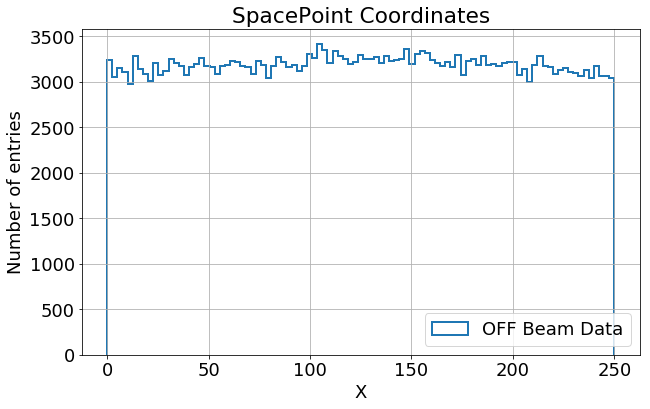

In [13]:
BINS = np.linspace(0,250,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_off_combined['sps_x'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')

plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=4)
plt.show()

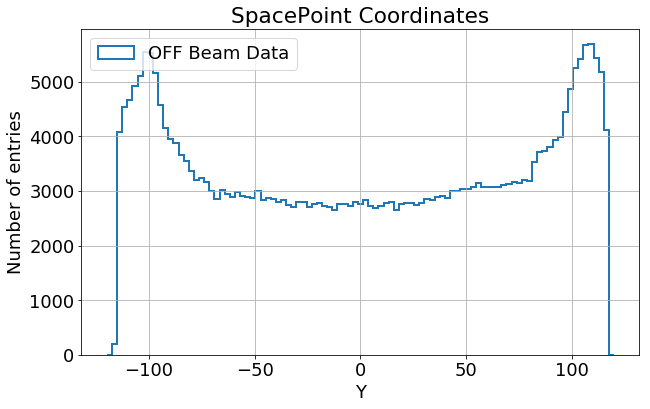

In [14]:
BINS = np.linspace(-120,120,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_off_combined['sps_y'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')

plt.title("SpacePoint Coordinates")
plt.xlabel('Y')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2)
plt.show()

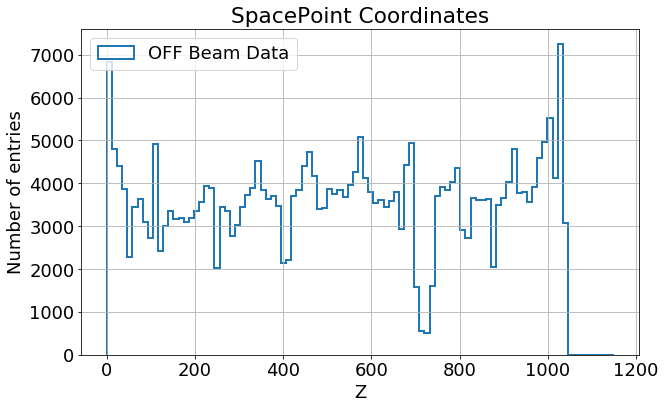

In [15]:
BINS = np.linspace(0,1150,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Sps_beam_off_combined['sps_z'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')

plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2)
plt.show()

In [16]:
# df_Sps_beam_off_run1_50ADC = df_Sps_beam_off_run1.query('sps_cluster_charge>10')

In [17]:
# df_Sps_beam_off_run1_threshold = df_Sps_beam_off_run1.query('sps_cluster_charge<50')

In [18]:
# fig = plt.figure(figsize=(10,6))

# plt.hist2d(df_Sps_beam_off_run1_threshold['sps_z'].values,df_Sps_beam_off_run1_threshold['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('X')

# plt.tight_layout()
# plt.show()

In [19]:
# fig = plt.figure(figsize=(10,6))
# plt.hist2d(df_Sps_beam_off_run1_threshold['sps_x'].values,df_Sps_beam_off_run1_threshold['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('X')
# plt.ylabel('Y')

# plt.tight_layout()
# plt.show()

In [20]:
# fig = plt.figure(figsize=(10,6))
# plt.hist2d(df_Sps_beam_off_run1_50ADC['sps_z'].values,df_Sps_beam_off_run1_50ADC['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')

# plt.tight_layout()
# plt.show()


In [21]:
# fig = plt.figure(figsize=(10,6))

# plt.hist2d(df_Sps_beam_off_run1['sps_z'].values,df_Sps_beam_off_run1['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('X')

# plt.tight_layout()
# plt.show()

In [22]:
# fig = plt.figure(figsize=(10,6))
# plt.hist2d(df_Sps_beam_off_run1['sps_x'].values,df_Sps_beam_off_run1['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('X')
# plt.ylabel('Y')

# plt.tight_layout()
# plt.show()

In [23]:
# fig = plt.figure(figsize=(10,6))
# plt.hist2d(df_Sps_beam_off_run1['sps_z'].values,df_Sps_beam_off_run1['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')

# plt.tight_layout()
# plt.show()
# fig.savefig('SpacePoint_Off_Beam_YZ', dpi=300)

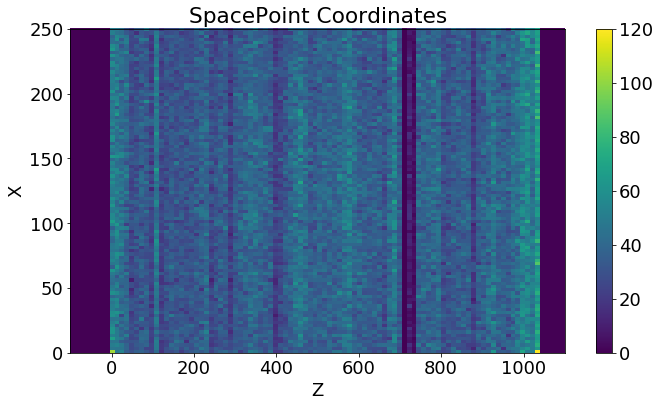

In [24]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_beam_off_combined['sps_z'].values,df_Sps_beam_off_combined['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('X')

plt.tight_layout()
plt.show()

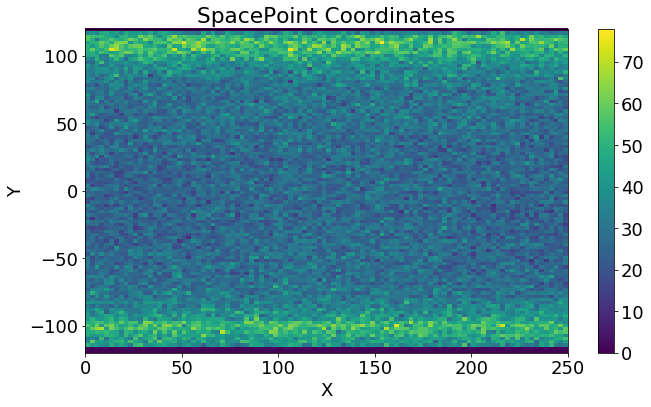

In [25]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_beam_off_combined['sps_x'].values,df_Sps_beam_off_combined['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

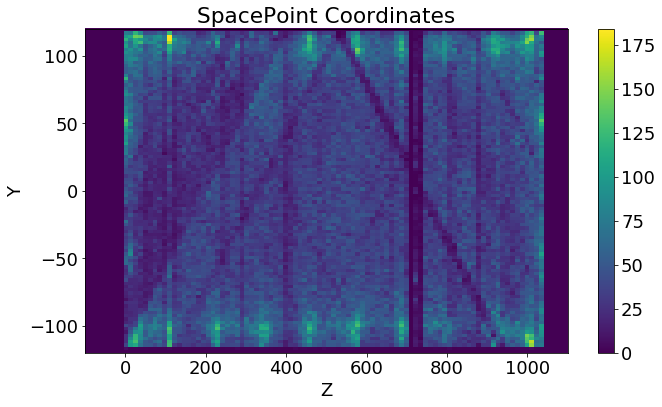

In [26]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Sps_beam_off_combined['sps_z'].values,df_Sps_beam_off_combined['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()
plt.show()
fig.savefig('SpacePoint_Off_Combined_Beam_YZ', dpi=300)

In [27]:
# fig = plt.figure(figsize=(30,7))
# plt.subplot(1, 3, 1)
# plt.hist2d(df_Sps_beam_off_run1['sps_z'].values,df_Sps_beam_off_run1['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='off_run1 Beam Data')#,norm=LogNorm())
# plt.colorbar()
# # plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('X')

# plt.subplot(1, 3, 2)
# plt.hist2d(df_Sps_beam_off_run1['sps_x'].values,df_Sps_beam_off_run1['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='off_run1 Beam Data')#,norm=LogNorm())
# plt.colorbar()
# # plt.title("SpacePoint Coordinates")
# plt.xlabel('X')
# plt.ylabel('Y')

# plt.subplot(1, 3, 3)
# plt.hist2d(df_Sps_beam_off_run1['sps_z'].values,df_Sps_beam_off_run1['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='off_run1 Beam Data')#,norm=LogNorm())
# plt.colorbar()
# # plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')

# plt.tight_layout()

# plt.show()
# fig.savefig('SpacePoint_off_run1_Beam', dpi=300)


In [28]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

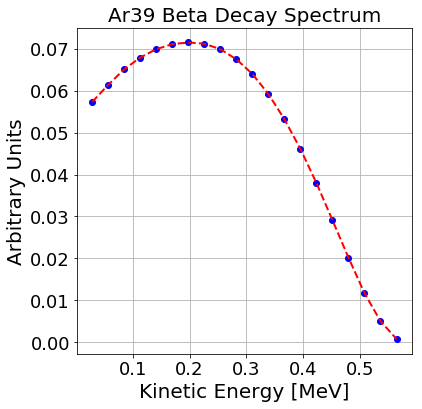

In [29]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

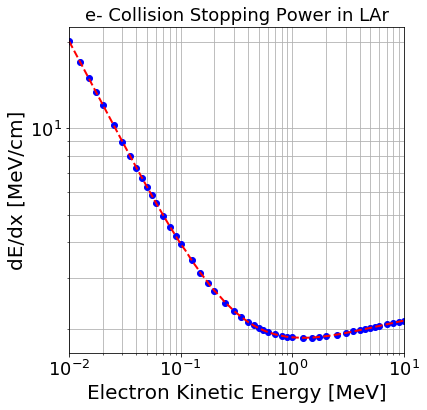

In [30]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

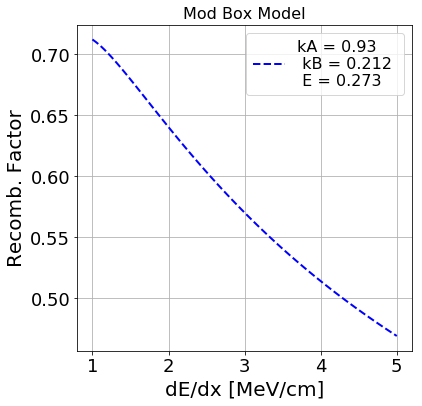

In [31]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

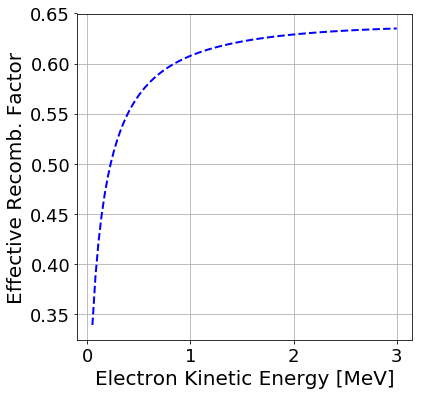

In [32]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



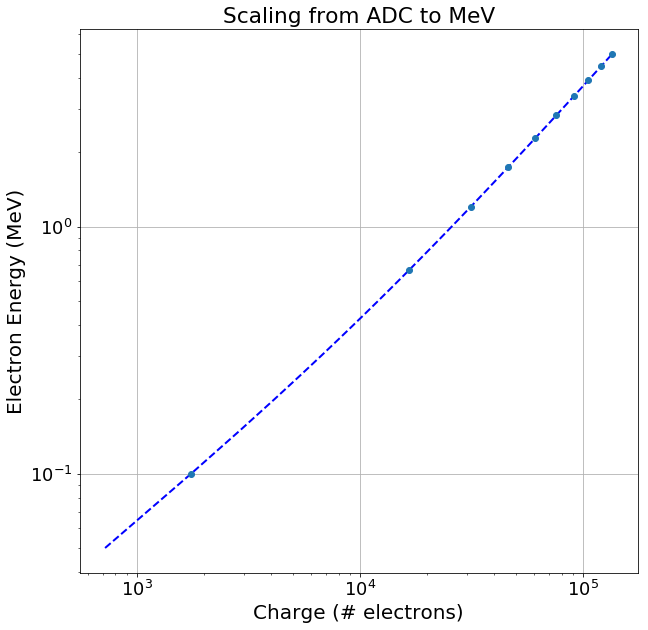

In [33]:
fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.05,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
print fQ2E
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)

In [34]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.237783355067


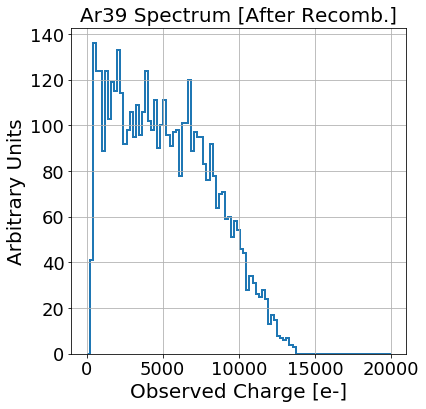

In [35]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [36]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

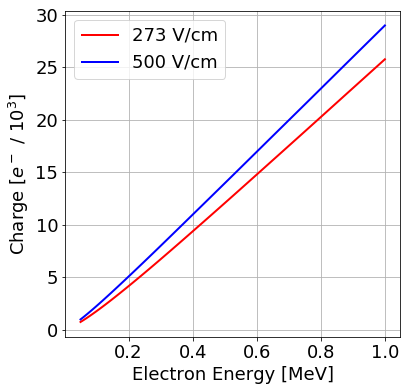

In [37]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [38]:
print Charge(0.2,0.273)


4129.221044959042


In [39]:
def E_recoY_off_run1(df,gain):
    YQ_off_run1 = df['sps_cluster_charge50']
    QrecoY_off_run1 = YQ_off_run1 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run1 = fQ2E(QrecoY_off_run1)
    return ErecoY_off_run1


def E_recoY_off_run3(df,gain):
    YQ_off_run3 = df['sps_cluster_charge50']
    QrecoY_off_run3 = YQ_off_run3 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run3 = fQ2E(QrecoY_off_run3)
    return ErecoY_off_run3

def E_recoY_on(df,gain):
    YQ_on  = df['sps_cluster_charge50']
    QrecoY_on = YQ_on * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on = fQ2E(QrecoY_on)
    return ErecoY_on

def E_recoY_MC(df,gain):
    YQ_MC  = df['sps_cluster_charge50']
    QrecoY_MC = YQ_MC * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_MC = fQ2E(QrecoY_MC)
    return ErecoY_MC
    
def E_recoY_off_run1_G10(df,gain):
    YQ_off_run1_G10  = df['sps_cluster_charge']
    QrecoY_off_run1_G10 = YQ_off_run1_G10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run1_G10 = fQ2E(QrecoY_off_run1_G10)
    return ErecoY_off_run1_G10


def E_recoY_off_run3_G10(df,gain):
    YQ_off_run3_G10  = df['sps_cluster_charge']
    QrecoY_off_run3_G10 = YQ_off_run3_G10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run3_G10 = fQ2E(QrecoY_off_run3_G10)
    return ErecoY_off_run3_G10

def E_recoY_off_run1_rest_det(df,gain):
    YQ_off_run1_rest_det  = df['sps_cluster_charge']
    QrecoY_off_run1_rest_det = YQ_off_run1_rest_det * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run1_rest_det = fQ2E(QrecoY_off_run1_rest_det)
    return ErecoY_off_run1_rest_det


def E_recoY_off_run3_rest_det(df,gain):
    YQ_off_run3_rest_det  = df['sps_cluster_charge']
    QrecoY_off_run3_rest_det = YQ_off_run3_rest_det * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run3_rest_det = fQ2E(QrecoY_off_run3_rest_det)
    return ErecoY_off_run3_rest_det


def E_recoY_off_run3_complementary(df,gain):
    YQ_off_run3_complementary  = df['sps_cluster_charge']
    QrecoY_off_run3_complementary = YQ_off_run3_complementary * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run3_complementary = fQ2E(QrecoY_off_run3_complementary)
    return ErecoY_off_run3_complementary

def E_recoY_off_run1_complementary(df,gain):
    YQ_off_run1_complementary  = df['sps_cluster_charge']
    QrecoY_off_run1_complementary = YQ_off_run1_complementary * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_run1_complementary = fQ2E(QrecoY_off_run1_complementary)
    return ErecoY_off_run1_complementary
  
    
    
def E_recoY_off_combined_rest_det(df,gain):
    YQ_off_combined_rest_det  = df['sps_cluster_charge']
    QrecoY_off_combined_rest_det = YQ_off_combined_rest_det * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_combined_rest_det = fQ2E(QrecoY_off_combined_rest_det)
    return ErecoY_off_combined_rest_det    
    
def E_recoY_off_combined_complementary(df,gain):
    YQ_off_combined_complementary  = df['sps_cluster_charge']
    QrecoY_off_combined_complementary = YQ_off_combined_complementary * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_combined_complementary = fQ2E(QrecoY_off_combined_complementary)
    return ErecoY_off_combined_complementary    
    

def E_recoY_off_combined_G10(df,gain):
    YQ_off_combined_G10  = df['sps_cluster_charge']
    QrecoY_off_combined_G10 = YQ_off_combined_G10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_combined_G10 = fQ2E(QrecoY_off_combined_G10)
    return ErecoY_off_combined_G10    
    
    
    #E_r=0.01 # MeV
    #while E_r<10:
    #    Eff_Recomb = EffectiveRecomb(E_r,0.01,0.273)
    #    Q_hypo=Eff_Recomb*E_r # MeV
    #    if Q_hypo>Qreco:
    #        return E_r
    #    E_r+=0.01
    #    
def E_reco_simple(YQ,gain):
    #YQ = df['Y_cluster_charge']
    Qreco = YQ * gain * (23.6/1e6) # MeV w/ no recomb factor
    E_r=0.01 # MeV
    while E_r<10:
        Eff_Recomb = EffectiveRecomb(E_r,0.01,0.273)
        Q_hypo=Eff_Recomb*E_r # MeV
        if Q_hypo>Qreco:
            return E_r
        E_r+=0.01

In [40]:
df_G10_off_run1=df_Sps_beam_off_run1.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_rest_det_off_run1=df_Sps_beam_off_run1.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')


# fig = plt.figure(figsize=(10,6))
# plt.hist2d(df_G10_off_run1['sps_z'].values,df_G10_off_run1['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='off_run1 Beam Data')
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')


# plt.show()



# print df_G10_off_run1.shape[0]


In [41]:
df_G10_off_run3=df_Sps_beam_off_run3.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_off_run3_cut=df_Sps_beam_off_run3.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) ')

df_rest_det_off_run3_cut=df_Sps_beam_off_run3.query('(sps_y < -90.0 or sps_y > 90.0)')




In [42]:
df_G10_off_combined=df_Sps_beam_off_combined.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_off_combined_cut=df_Sps_beam_off_combined.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) ')

df_rest_det_off_combined_cut=df_Sps_beam_off_combined.query('(sps_y > -90.0 and sps_y < 90.0)')#' and (sps_z>20 and sps_z<1000) ')


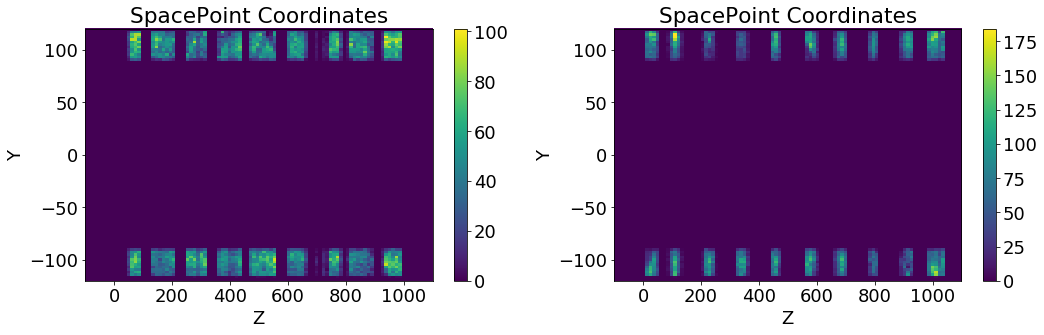

In [43]:
fig = plt.figure(figsize=(15,5))

df_G10_off_combined_complementary=df_Sps_beam_off_combined.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
df_G10_off_run3_complementary=df_Sps_beam_off_run3.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')


plt.subplot(1, 2, 1)

#plt.hist2d(df_Sps_beam_off_combined['sps_z'].values,df_Sps_beam_off_combined['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='off_combined Beam Data')#,norm=LogNorm())
plt.hist2d(df_G10_off_combined_complementary['sps_z'].values,df_G10_off_combined_complementary['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='off_combined Beam Data')#,norm=LogNorm())

plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')


plt.subplot(1, 2, 2)

#plt.hist2d(df_G10_off_combined_complementary['sps_z'].values,df_G10_off_combined_complementary['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='off_combined Beam Data')#,norm=LogNorm())
plt.hist2d(df_G10_off_combined_cut['sps_z'].values,df_G10_off_combined_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='off_combined Beam Data')#,norm=LogNorm())

plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()
plt.show()
fig.savefig('G-10_combined.png', dpi=400)

In [44]:
df_G10_on_off=df_Sps_beam_on_off.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')


In [45]:
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,500,50)
# plt.hist(df_G10_off_run1['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled')
# plt.title("Charge Distribution for G10 SpacePoints")
# plt.xlabel('Charge (ADC)')
# plt.ylabel('Entries')
# #plt.legend(loc=1)
# plt.grid()
# plt.show()

In [46]:
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,200,500)
# plt.hist(df_G10_off_run3_cut['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled')
# plt.title("Charge Distribution for G10 SpacePoints")
# plt.xlabel('Charge (ADC)')
# plt.ylabel('Entries')
# #plt.legend(loc=1)
# plt.grid()
# plt.show()

In [47]:
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,200,500)
# plt.hist(df_G10_off_run3_complementary['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled')
# plt.title("Charge Distribution for G10 SpacePoints")
# plt.xlabel('Charge (ADC)')
# plt.ylabel('Entries')
# #plt.legend(loc=1)
# plt.grid()
# plt.show()

In [48]:
df_sps_charge_off_run1_G10=df_G10_off_run1.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
df_sps_charge_off_run1_G10['energy']=E_recoY_off_run1_G10(df_sps_charge_off_run1_G10,238.4)
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,5,500)
# plt.hist(df_sps_charge_off_run1_G10['energy'].values,bins=BINS,histtype='stepfilled',label='off_run1 BEAM')
# plt.title("Energy Distribution for G10 SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.show()

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
df_sps_charge_off_run3_G10=df_G10_off_run3_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
df_sps_charge_off_run3_G10['energy']=E_recoY_off_run3_G10(df_sps_charge_off_run3_G10,238.4)
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,5,500)
# plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='stepfilled',label='off_run3 BEAM')
# plt.title("Energy Distribution for G10 SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.show()

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
df_sps_charge_off_run3_complementary=df_G10_off_run3_complementary.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 5.')
df_sps_charge_off_run3_complementary['energy']=E_recoY_off_run3_complementary(df_sps_charge_off_run3_complementary,238.4)
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,5,500)
# plt.hist(df_sps_charge_off_run3_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='off_run3 BEAM')
# plt.title("Energy Distribution for G10 SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.show()

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


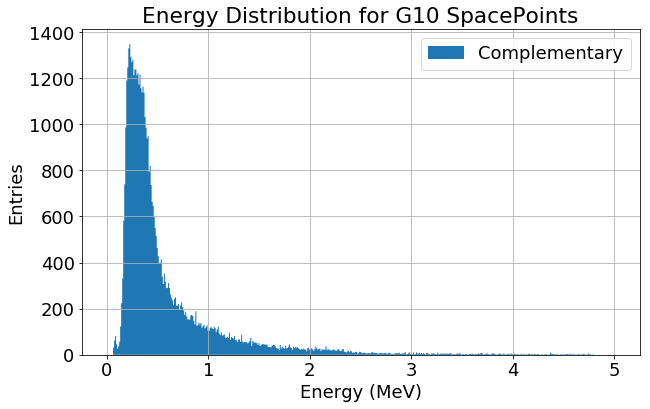

In [51]:
df_sps_charge_off_combined_complementary=df_G10_off_combined_complementary.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 4.')
df_sps_charge_off_combined_complementary['energy']=E_recoY_off_combined_complementary(df_sps_charge_off_combined_complementary,238.4)
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,5,500)
plt.hist(df_sps_charge_off_combined_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='Complementary')
plt.title("Energy Distribution for G10 SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


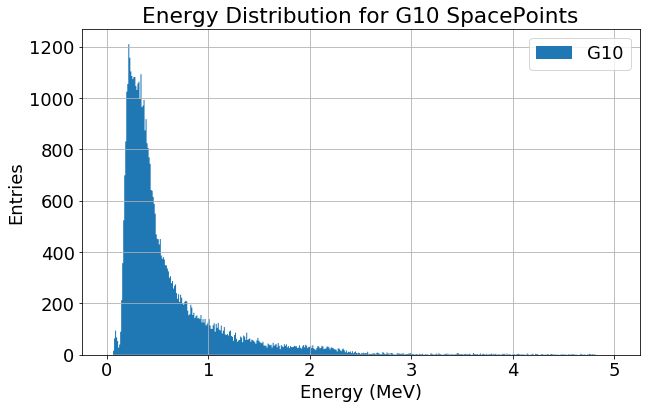

In [52]:
df_sps_charge_off_combined_G10=df_G10_off_combined_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 4.')
df_sps_charge_off_combined_G10['energy']=E_recoY_off_combined_G10(df_sps_charge_off_combined_G10,238.4)
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,5,500)
plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='stepfilled',label='G10')
plt.title("Energy Distribution for G10 SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


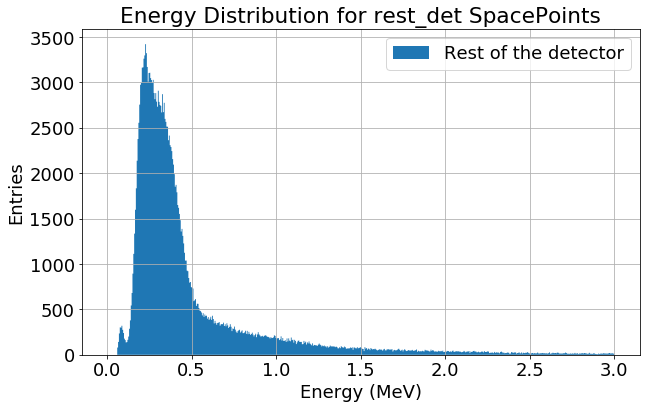

In [53]:
# df_rest_det_off_combined=df_Sps_beam_off_combined.query('(sps_y < -90.0 or sps_y > 90.0)')

df_sps_charge_off_combined_rest_det=df_rest_det_off_combined_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 4.')
df_sps_charge_off_combined_rest_det['energy']=E_recoY_off_combined_rest_det(df_sps_charge_off_combined_rest_det,238.4)
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,3,600)
plt.hist(df_sps_charge_off_combined_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='Rest of the detector')
plt.title("Energy Distribution for rest_det SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

In [54]:
# fig = plt.figure(figsize=(10,6))


# plt.hist2d(df_rest_det_off_run3_cut['sps_z'].values,df_rest_det_off_run3_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')


# plt.show()

In [55]:

# fig = plt.figure(figsize=(15,5))


# plt.subplot(1, 2, 1)

# plt.hist2d(df_rest_det_off_run3_cut['sps_z'].values,df_rest_det_off_run3_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')


# plt.subplot(1, 2, 2)

# plt.hist2d(df_G10_off_run3_cut['sps_z'].values,df_G10_off_run3_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
# plt.colorbar()
# plt.title("SpacePoint Coordinates")
# plt.xlabel('Z')
# plt.ylabel('Y')

# plt.tight_layout()
# plt.show()
# #fig.savefig('Isolation_comp.png', dpi=400)

In [56]:
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,500,50)
# plt.hist(df_rest_det_off_run3_cut['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled',label='OFF Beam')
# plt.title("Charge Distribution for rest_det SpacePoints")
# plt.xlabel('Charge (ADC)')
# plt.ylabel('Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.show()

In [57]:
# df_sps_charge_off_rest_det=df_rest_det_off_run3_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 3.')
# df_sps_charge_off_rest_det['energy']=E_recoY_off_run3_rest_det(df_sps_charge_off_rest_det,238.4)
# fig = plt.figure(figsize=(10,6))
# BINS=np.linspace(0,5,500)
# plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='OFF Beam')
# plt.title("Energy Distribution for rest_det SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.show()

In [58]:
# fig = plt.figure(figsize=(15,6))

# BINS=np.linspace(0,3,600)
# plt.subplot(1, 2, 1)


# plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='Rest of the detector',alpha=0.7)
# plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)
# #plt.title("Energy Distribution for SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.legend(loc=1)
# plt.grid()


# plt.subplot(1, 2, 2)


# plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='step',label='Rest of the detector',alpha=1,density=True,lw=1)
# plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='step',label='Isolated G10 region ',alpha=1,density=True,lw=1)
# #plt.title("Energy Distribution for SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Area Normalized')
# plt.legend(loc=1)
# plt.grid()
# plt.show()
# #fig.savefig('Energy_comp.png', dpi=400)

In [59]:
# fig = plt.figure(figsize=(15,6))

# BINS=np.linspace(0,3,100)
# plt.subplot(1, 2, 1)


# plt.hist(df_sps_charge_off_run3_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='Complementary Region',alpha=0.7)
# plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)
# #plt.title("Energy Distribution for SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.legend(loc=1)
# plt.grid()


# plt.subplot(1, 2, 2)


# plt.hist(df_sps_charge_off_run3_complementary['energy'].values,bins=BINS,histtype='step',label='Complementary Region',alpha=1,density=True,lw=1)
# plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='step',label='Isolated G10 region ',alpha=1,density=True,lw=1)
# #plt.title("Energy Distribution for SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Area Normalized')
# plt.legend(loc=1)
# plt.grid()
# plt.show()
# #fig.savefig('Energy_comp.png', dpi=400)

In [60]:

# scaling_factor= 0.37864077669
# nRest_det = len(df_sps_charge_off_rest_det)
# weights_Rest_det = np.ones(nRest_det) * scaling_factor # factor needed to scale off-beam to on-beam


In [61]:
# fig = plt.figure(figsize=(20,6))

# BINS=np.linspace(0,3,600)
# plt.subplot(1, 2, 1)

# n1, bins1, p1 = plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)

# n2, bins2, p2 = plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='Rest of the detector',alpha=0.7,weights=weights_Rest_det)
# #plt.title("Energy Distribution for SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.title("Comparison (Re-Scaled by area)")
# #plt.show()
# plt.subplot(1, 2, 2)
# binsc1 = 0.5*(bins1[:-1]+bins1[1:])
# #fig = plt.figure(figsize=(10,6))
# plt.fill_between(binsc1,(n1-n2), alpha=0.7)
# plt.plot(binsc1,(n1-n2))
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.grid()
# plt.title("Actual G-10 Energy Spectrum")
# plt.show()
# fig.savefig('Reweighted_comparison.png', dpi=400)


In [62]:

# scaling_factor_complementary= 0.609375
# ncomplementary = len(df_sps_charge_off_run3_complementary)
# weights_complementary = np.ones(ncomplementary) * scaling_factor_complementary # factor needed to scale off-beam to on-beam


In [63]:
# fig = plt.figure(figsize=(20,6))

# BINS=np.linspace(0,3,100)
# plt.subplot(1, 2, 1)

# n1_comp, bins1_comp, p1_comp = plt.hist(df_sps_charge_off_run3_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)

# n2_comp, bins2, p2 = plt.hist(df_sps_charge_off_run3_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='Complementary',alpha=0.7,weights=weights_complementary)
# #plt.title("Energy Distribution for SpacePoints")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.title("Comparison (Re-Scaled by area)")
# #plt.show()
# plt.subplot(1, 2, 2)
# binsc1 = 0.5*(bins1_comp[:-1]+bins1_comp[1:])
# #fig = plt.figure(figsize=(10,6))
# plt.fill_between(binsc1,(n1_comp-n2_comp), alpha=0.7)
# plt.plot(binsc1,(n1_comp-n2_comp))
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.grid()
# plt.title("Actual G-10 Energy Spectrum")
# plt.show()
# #fig.savefig('Reweighted_comparison.png', dpi=400)

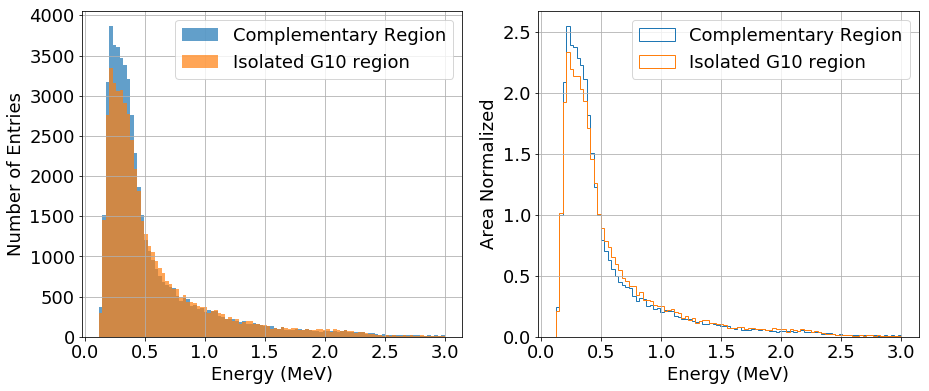

In [103]:
fig = plt.figure(figsize=(15,6))

#BINS=np.linspace(0.12,3,100)
BINS=np.linspace(0.12,3,100)
plt.subplot(1, 2, 1)


plt.hist(df_sps_charge_off_combined_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='Complementary Region',alpha=0.7)
plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()


plt.subplot(1, 2, 2)


plt.hist(df_sps_charge_off_combined_complementary['energy'].values,bins=BINS,histtype='step',label='Complementary Region',alpha=1,density=True,lw=1)
plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='step',label='Isolated G10 region ',alpha=1,density=True,lw=1)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()
plt.show()
fig.savefig('Energy_comp_combined.png', dpi=400)

In [104]:
scaling_factor_complementary= 0.609375
ncomplementary = len(df_sps_charge_off_combined_complementary)
weights_complementary = np.ones(ncomplementary) * scaling_factor_complementary # factor needed to scale off-beam to on-beam


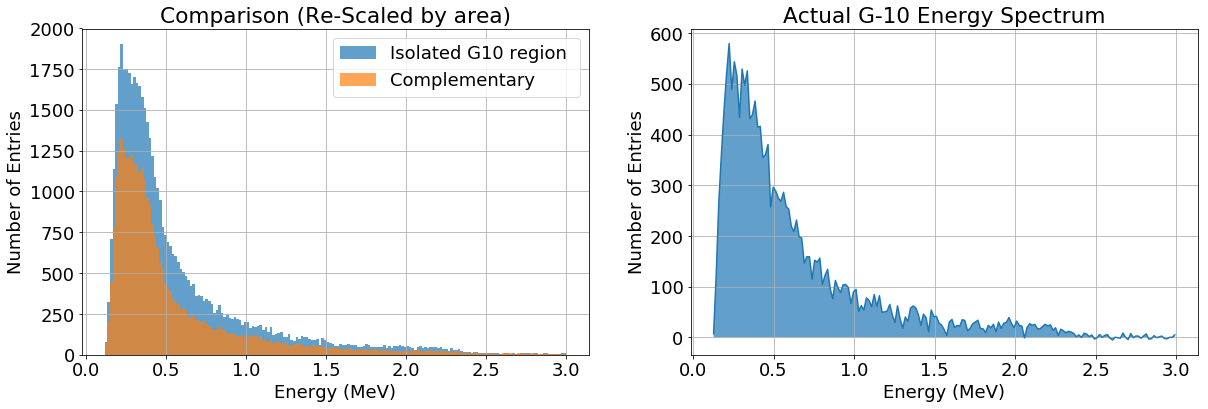

In [105]:
fig = plt.figure(figsize=(20,6))

BINS=np.linspace(0.12,3,180)
plt.subplot(1, 2, 1)

n1_comp, bins1_comp, p1_comp = plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)

n2_comp, bins2, p2 = plt.hist(df_sps_charge_off_combined_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='Complementary',alpha=0.7,weights=weights_complementary)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()
plt.title("Comparison (Re-Scaled by area)")
#plt.show()
plt.subplot(1, 2, 2)
binsc1 = 0.5*(bins1_comp[:-1]+bins1_comp[1:])
#fig = plt.figure(figsize=(10,6))
plt.fill_between(binsc1,(n1_comp-n2_comp), alpha=0.7)
plt.plot(binsc1,(n1_comp-n2_comp))
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.grid()
plt.title("Actual G-10 Energy Spectrum")
plt.show()
fig.savefig('Reweighted_comparison_combined.png', dpi=400)

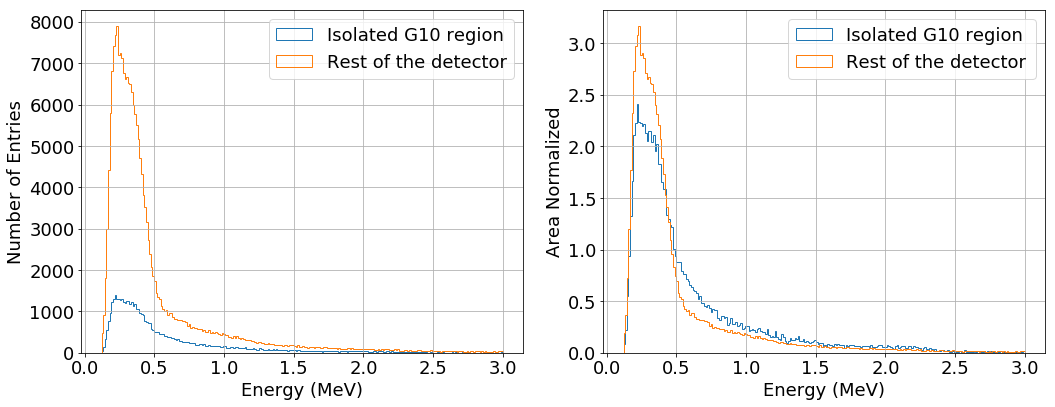

In [106]:
fig = plt.figure(figsize=(15,6))

BINS=np.linspace(0.12,3,245)
#BINS=np.linspace(0.12,3,150)
plt.subplot(1, 2, 1)

# n1_comp, bins1_comp, p1_comp = plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)

# n2_comp, bins2, p2 = plt.hist(df_sps_charge_off_combined_complementary['energy'].values,bins=BINS,histtype='stepfilled',label='Complementary',alpha=0.7,weights=weights_complementary)
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Number of Entries')
# plt.legend(loc=1)
# plt.grid()
# plt.title("Comparison (Re-Scaled by area)")

n12_comp, bins12_comp, p12_comp = plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='step',label='Isolated G10 region',alpha=1,lw=1)
n13_comp, bins13_comp, p13_comp = plt.hist(df_sps_charge_off_combined_rest_det['energy'].values,bins=BINS,histtype='step',label='Rest of the detector',alpha=1,lw=1)

#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()


plt.subplot(1, 2, 2)


plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='step',label='Isolated G10 region ',alpha=1,density=True,lw=1)
plt.hist(df_sps_charge_off_combined_rest_det['energy'].values,bins=BINS,histtype='step',label='Rest of the detector',alpha=1,density=True,lw=1)

#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig('Energy_comp_new.png', dpi=400)

In [107]:
#scaling_factor_new= (0.37864077669)

scaling_factor_new= (0.0714077669)
nRest_det_new = len(df_sps_charge_off_combined_rest_det)
weights_Rest_det_new = np.ones(nRest_det_new) * scaling_factor_new # factor needed to scale off-beam to on-beam


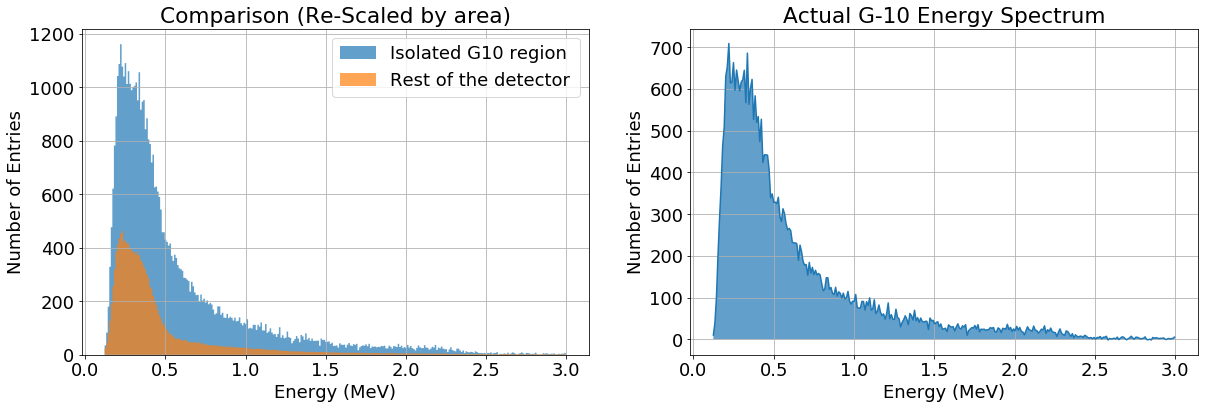

In [109]:
fig = plt.figure(figsize=(20,6))

BINS=np.linspace(0.12,3,300)

plt.subplot(1, 2, 1)

n1, bins1, p1 = plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)

n2, bins2, p2 = plt.hist(df_sps_charge_off_combined_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='Rest of the detector',alpha=0.7,weights=weights_Rest_det_new)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()
plt.title("Comparison (Re-Scaled by area)")
#plt.show()
plt.subplot(1, 2, 2)
binsc1 = 0.5*(bins1[:-1]+bins1[1:])
#fig = plt.figure(figsize=(10,6))
plt.fill_between(binsc1,(n1-n2), alpha=0.7)

plt.plot(binsc1,(n1-n2))
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.grid()
plt.title("Actual G-10 Energy Spectrum")
plt.show()
fig.savefig('Reweighted_comparison_combined_new.png', dpi=400)


/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


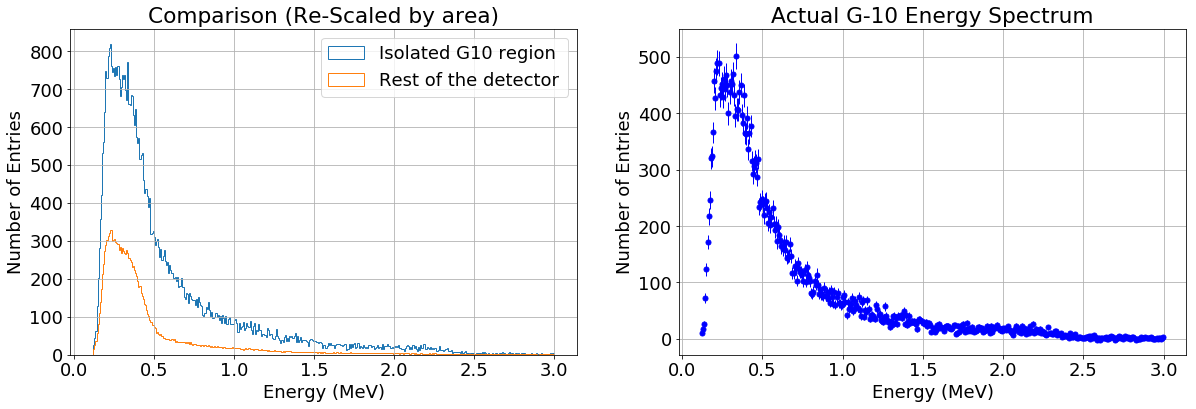

In [110]:
fig = plt.figure(figsize=(20,6))

BINS=np.linspace(0.12,3,420)
plt.subplot(1, 2, 1)


n1, bins1, p1 = plt.hist(df_sps_charge_off_combined_G10['energy'].values,bins=BINS,histtype='step',label='Isolated G10 region ',alpha=1,lw=1)
n2, bins2, p2 = plt.hist(df_sps_charge_off_combined_rest_det['energy'].values,bins=BINS,histtype='step',label='Rest of the detector',alpha=1,weights=weights_Rest_det_new,lw=1)

#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()
plt.title("Comparison (Re-Scaled by area)")
#plt.show()
plt.subplot(1, 2, 2)
binsc1 = 0.5*(bins1[:-1]+bins1[1:])
#fig = plt.figure(figsize=(10,6))
# plt.fill_between(binsc1,(n1-n2), alpha=0.8)

errors = np.sqrt(n1-n2)

plt.errorbar(binsc1,(n1-n2),yerr=errors,fmt='o',color='blue',markersize=5,lw=1)
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.grid()
plt.title("Actual G-10 Energy Spectrum")
plt.show()
fig.savefig('Reweighted_comparison_combined_new.png', dpi=400)


In [100]:
#from scipy.stats import chisquare as chi2

In [101]:
# obs =df_sps_charge_off_run3_G10['energy']
# exp=df_sps_charge_off_rest_det['energy']
# exp.shape


In [102]:
# obs.shape

In [74]:
# n_exp = len(df_sps_charge_off_rest_det['energy'])
# n_obs = len(df_sps_charge_off_run3_G10['energy'])
# weights_exp = np.ones(n_exp) * (1/(n_obs)) # factor needed to scale off-beam to on-beam


In [75]:
# expected= (np.exp,weights_exp)


In [76]:
# #df_date_time=pd.to_datetime(df_Event_beam_off_radio_run3['evttime'],unit='s').apply(lambda x: x.date())
# fig = plt.figure(figsize=(15,6))
# plt.scatter(df_Event_beam_off_run3['evttime'].values,df_Event_beam_off_run3['N_sps'].values )
# plt.show()

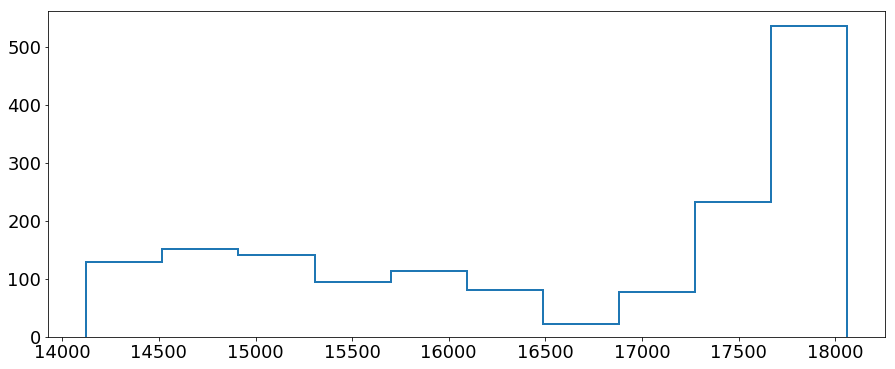

('t0: ', 14124)
('t_max: ', 18062)
('t_max-t0: ', 3938)


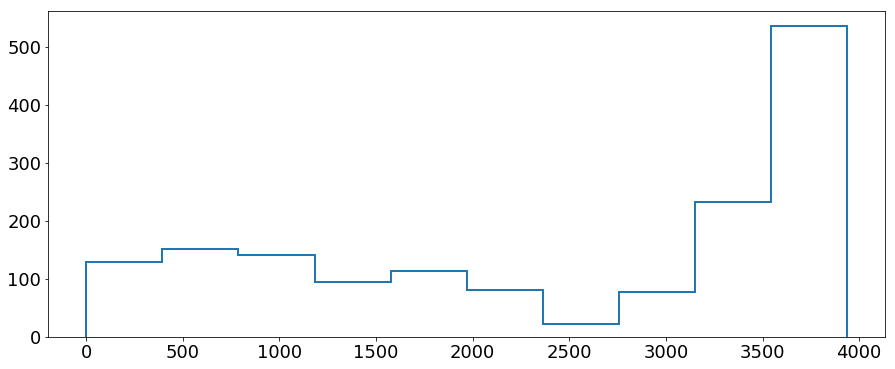

0
3938


In [77]:
fig = plt.figure(figsize=(15,6))
#BINS=np.linspace(4000,8000,4002)
plt.hist(df_Event_beam_off_run3['N_Run'].values,histtype='step',label='Run Numbers',alpha=1,lw=2)
plt.show()
t0=(df_Event_beam_off_run3['N_Run'].min())
t_max=(df_Event_beam_off_run3['N_Run'].max())
print('t0: ',t0)
print('t_max: ',t_max)
print('t_max-t0: ',t_max-t0)
df_time=df_Event_beam_off_run3['N_Run']-t0
fig = plt.figure(figsize=(15,6))

plt.hist(df_time,histtype='step',label='Time',alpha=1,lw=2)

plt.show()
print(df_time.min())
print(df_time.max())

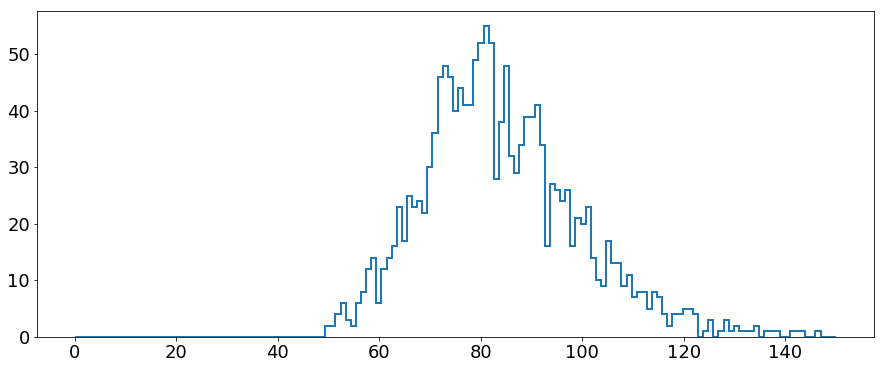

In [78]:

fig = plt.figure(figsize=(15,6))
BINS=np.linspace(0,150,150)
plt.hist(df_Event_beam_off_run3['N_sps'].values,bins=BINS,histtype='step',alpha=1,lw=2)
plt.show()

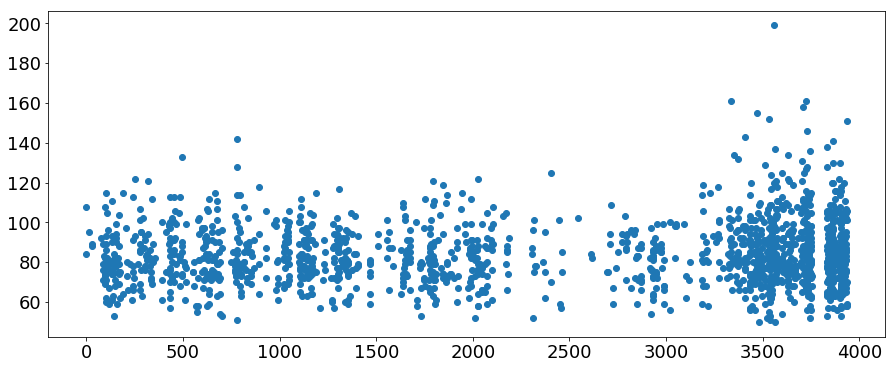

In [79]:
fig = plt.figure(figsize=(15,6))
#df_radio_check=[df_time,df_Event_beam_off_radio['N_sps']]
#df.plot(x='df_time', y='N_sps', style='o')
plt.scatter(df_time, df_Event_beam_off_run3['N_sps'].values)
plt.show()

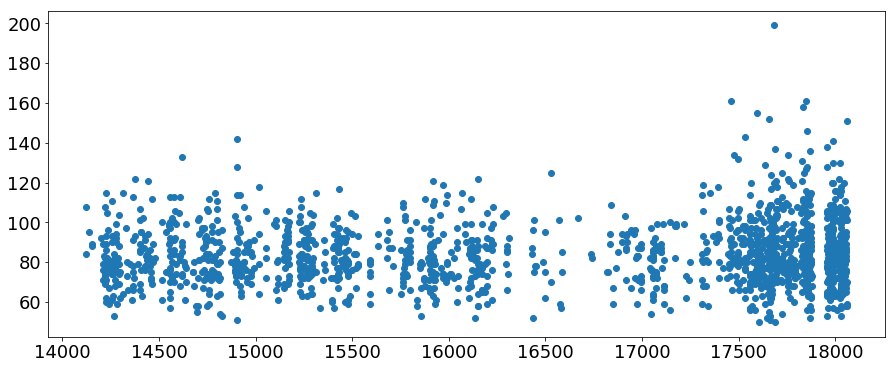

In [80]:
fig = plt.figure(figsize=(15,6))
#df_radio_check=[df_Event_beam_off_radio['N_Run'].values,df_Event_beam_off_radio['N_sps']]
#df.plot(x='df_time', y='N_sps', style='o')
#result = df_Event_beam_off_radio['N_Run'].values.append(df_Event_beam_off_radio['N_sps'])
plt.scatter(df_Event_beam_off_run3['N_Run'].values, df_Event_beam_off_run3['N_sps'].values)
plt.show()

In [81]:
df_average=df_Event_beam_off_run3.groupby('N_Run').mean().reset_index()
df_average.head()

,N_Run,evttime,Vertex_x,Vertex_y,Vertex_z,_rand_vtx_x,_rand_vtx_y,_rand_vtx_z,distance_smallest,N_sps,...,neutrinoshowers,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,N_SubRun
0,14124,1.512188e+09,76.494556,17.000477,471.113792,255.933888,-78.204909,291.096339,2.541231,96.00,...,0.0,2.0,-0.153643,0.607600,0.481911,70.353432,187.307700,42.900942,0.50,163.5
1,14139,1.512329e+09,114.809280,28.897907,730.804932,255.933888,-78.204909,291.096339,49.798335,95.00,...,0.0,2.0,0.350806,0.787711,0.506406,106.824791,263.523706,65.915854,0.00,237.0
2,14152,1.512469e+09,135.362190,8.006061,544.017960,243.798789,-2.788421,527.883895,36.682761,88.50,...,0.0,1.0,-0.020040,0.247368,0.424937,141.346191,217.364163,50.417038,0.50,228.5
3,14202,1.512833e+09,97.288216,14.605695,291.836700,255.933888,-78.204909,291.096339,65.477377,92.00,...,0.0,3.0,-0.914309,-0.404914,-0.009155,199.803680,199.803673,5.466203,1.00,120.0
4,14212,1.512899e+09,116.220629,22.139008,749.650970,252.571285,-74.217602,343.202960,21.689422,78.75,...,0.0,1.5,-0.036913,0.525961,0.514271,137.738449,222.117873,74.497766,0.25,52.5


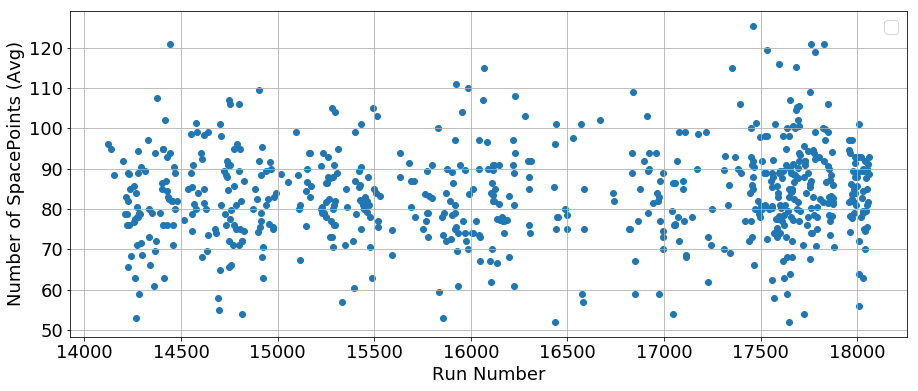

In [82]:
fig = plt.figure(figsize=(15,6))

plt.scatter(df_average['N_Run'].values, df_average['N_sps'].values)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints (Avg)')
plt.legend(loc=1)
plt.grid()
plt.show()


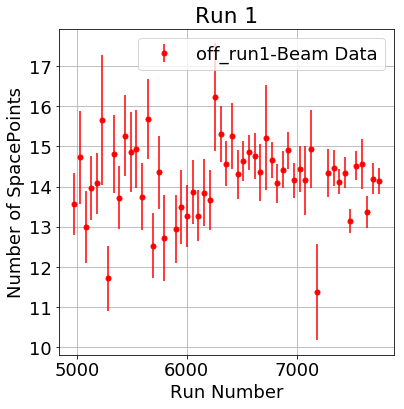

In [83]:
RUN_MIN = 4952
RUN_MAX = 7770

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event = (df_Event_beam_off_run1.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10   = (df_Sps_beam_off_run1.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))') 
    N_G10_shape= N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='off_run1-Beam Data')
#plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Run 1")
plt.legend(loc=1)
plt.grid()
plt.show()


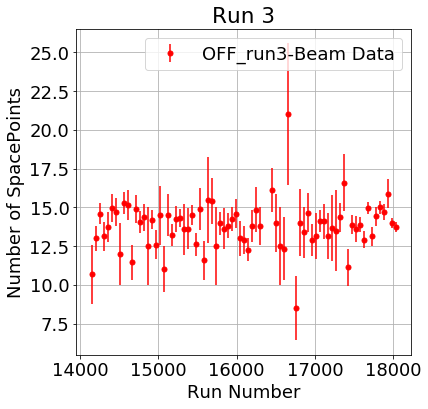

In [84]:
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10   = (df_Sps_beam_off_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))') 
    N_G10_shape= N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF_run3-Beam Data')
#plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Run 3")
plt.legend(loc=1)
plt.grid()
plt.show()


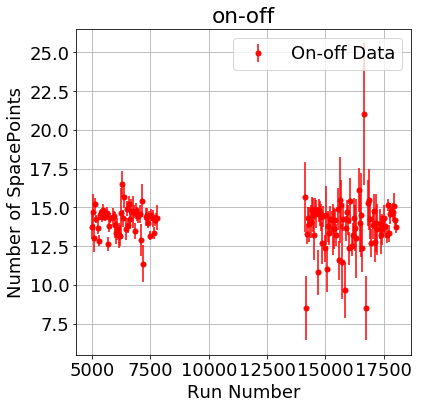

In [85]:
RUN_MIN = df_Event_beam_on_off['N_Run'].min()
RUN_MAX = df_Event_beam_on_off['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event = (df_Event_beam_on_off.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_shape= N_event.shape[0]
    if (N_event_shape == 0): continue
    N_G10   = (df_Sps_beam_on_off.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10 =N_G10.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))') 
    N_G10_shape= N_G10.shape[0]
    Rate = N_G10_shape / float(N_event_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_shape)/N_event_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='On-off Data')
#plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("on-off")
plt.legend(loc=1)
plt.grid()
plt.show()


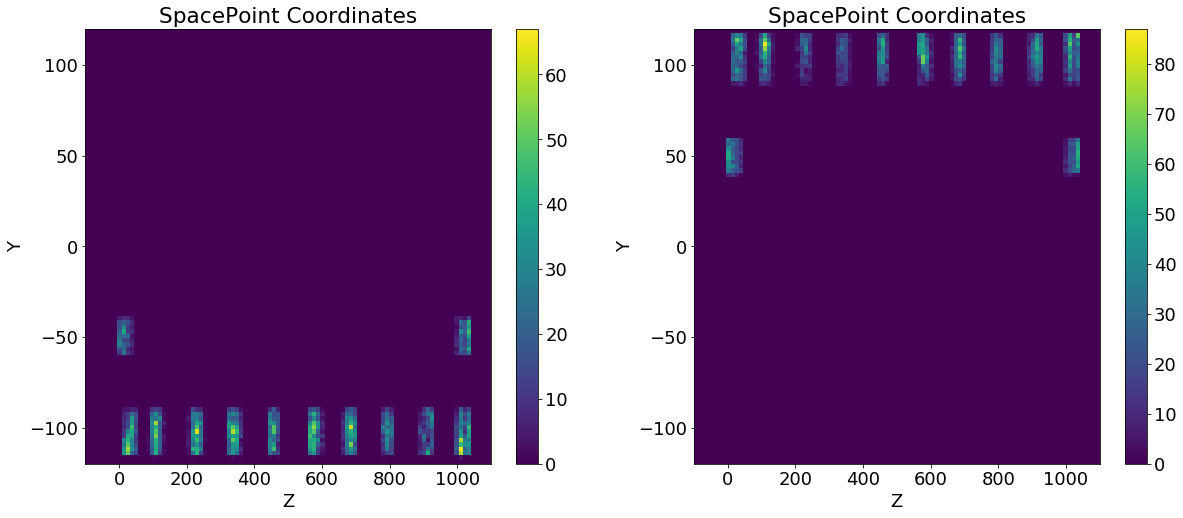

In [86]:
#df_G10_off_cut=df_Sps_beam_off_cone.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_off_bottom=df_Sps_beam_off_run3.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_off_top=df_Sps_beam_off_run3.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')

fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.hist2d(df_G10_off_bottom['sps_z'].values,df_G10_off_bottom['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')




plt.subplot(1, 2, 2)
plt.hist2d(df_G10_off_top['sps_z'].values,df_G10_off_top['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates")
plt.xlabel('Z')
plt.ylabel('Y')

plt.show()

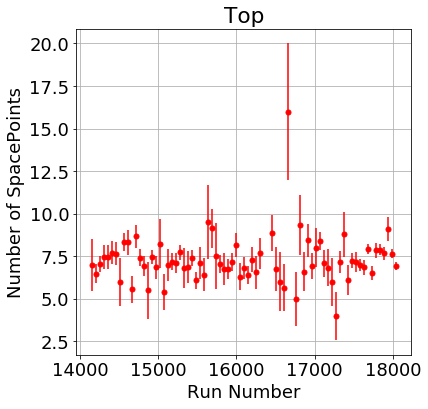

In [87]:
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_top = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_top_shape= N_event_top.shape[0]
    if (N_event_top_shape == 0): continue
    N_G10_top   = (df_Sps_beam_off_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_top =N_G10_top.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_top_shape =N_G10_top.shape[0]
    Rate = N_G10_top_shape / float(N_event_top_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_top_shape)/N_event_top_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
#plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Top")
#plt.legend(loc=1)
plt.grid()
plt.show()

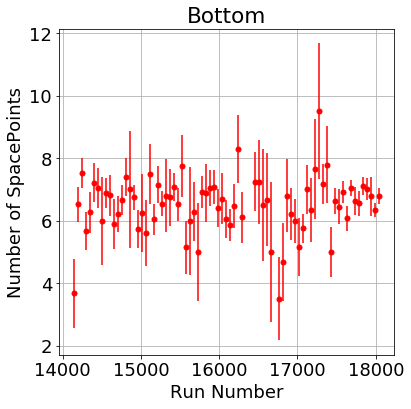

In [88]:
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_Sps_beam_off_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_bottom =N_G10_bottom.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
#plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Bottom")
#plt.legend(loc=1)
plt.grid()
plt.show()

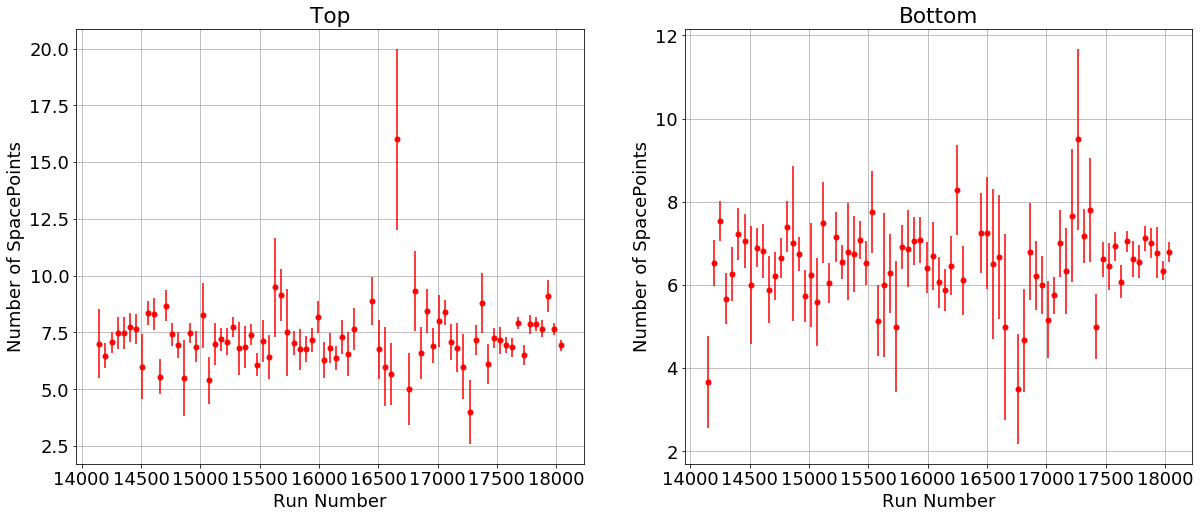

In [89]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_top = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_top_shape= N_event_top.shape[0]
    if (N_event_top_shape == 0): continue
    N_G10_top   = (df_Sps_beam_off_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_top =N_G10_top.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_top_shape =N_G10_top.shape[0]
    Rate = N_G10_top_shape / float(N_event_top_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_top_shape)/N_event_top_shape)

#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
#plt.ylim(2,7)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Top")
#plt.legend(loc=1)
plt.grid()

plt.subplot(1, 2, 2)
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_Sps_beam_off_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_bottom =N_G10_bottom.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)

#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
#plt.ylim(2,7)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Bottom")
#plt.legend(loc=1)
plt.grid()
plt.show()

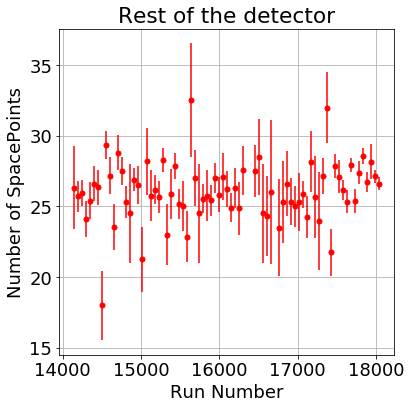

In [90]:
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_rest_det_off_run3_cut.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    #N_G10_bottom =N_G10_bottom.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
# plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Rest of the detector")
#plt.legend(loc=1)
plt.grid()
plt.show()

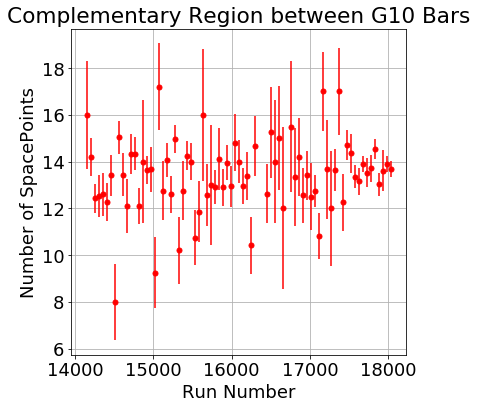

In [91]:
RUN_MIN = df_Event_beam_off_run3['N_Run'].min()
RUN_MAX = df_Event_beam_off_run3['N_Run'].max()

BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/50)#Bin width~10 

BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_complementary = (df_Event_beam_off_run3.query('N_Run > %i and N_Run < %i'%(BIN_MIN,BIN_MAX)))
    N_event_complementary_shape= N_event_complementary.shape[0]
    if (N_event_complementary_shape == 0): continue
    N_G10_complementary   = (df_Sps_beam_off_run3.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_complementary =N_G10_complementary.query('((sps_y < -90.0 or sps_y > 90.0) and ( (sps_z>50 and sps_z<90) or (sps_z>130 and sps_z<210) or (sps_z>250 and sps_z<320) or (sps_z>360 and sps_z<440) or (sps_z>470 and sps_z<560) or (sps_z>600 and sps_z<660) or (sps_z>700 and sps_z<780) or (sps_z>810 and sps_z<890) or (sps_z>930 and sps_z<990) or (sps_z>1100 ) ))  ')
    N_G10_complementary_shape = N_G10_complementary.shape[0]
    Rate = N_G10_complementary_shape / float(N_event_complementary_shape)
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_complementary_shape)/N_event_complementary_shape)
fig = plt.figure(figsize=(6,6))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data')
# plt.ylim(6,12)
plt.xlabel('Run Number')
plt.ylabel('Number of SpacePoints')
plt.title("Complementary Region between G10 Bars")
#plt.legend(loc=1)
plt.grid()
plt.show()

In [92]:
df_Event_beam_off_run3.head()

,evttime,Vertex_x,Vertex_y,Vertex_z,_rand_vtx_x,_rand_vtx_y,_rand_vtx_z,distance_smallest,N_sps,Event_cluster_charge,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,N_Run,N_SubRun
4,1516629825,133.670792,-27.872030,371.236450,245.114101,56.678840,556.244968,48.271997,91,40.689270,...,1,0.027283,0.466834,0.883924,202.075592,206.483043,156.118033,0,14741,187
5,1521868535,165.706223,-11.926538,208.751495,255.933888,-78.204909,291.096339,17.775823,79,14.001721,...,1,0.490372,0.823621,0.284928,128.038437,378.653798,78.074167,0,15771,25
8,1527797816,203.782257,5.192170,478.434723,255.933888,-78.204909,291.096339,55.210568,71,18.816933,...,1,0.653567,-0.728847,0.204041,73.087502,285.024980,74.934317,0,16919,279
11,1515805676,153.014984,25.073736,756.905640,245.114101,56.678840,556.244968,3.080658,83,116.283073,...,3,0.095795,-0.039240,0.994627,48.079979,225.480559,79.790432,0,14611,11
13,1512899548,77.508522,46.355247,679.936584,242.483477,-62.255682,499.522823,4.254291,79,1938.287354,...,2,-0.319952,0.723922,0.611202,87.754150,203.795151,71.537930,0,14212,54


In [93]:
df_Sps_beam_off_run3.head()

,evttime,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,pointdistance_trk_smallest,distance_trk_smallest
298,1516629825,195.647385,-11.240958,0.525101,376.224128,54.598679,9393,14741,187,133.670792,...,1,0.027283,0.466834,0.883924,202.075592,206.483043,156.118033,0,607.824569,240.141139
299,1516629825,206.103943,49.294216,1.986983,384.117638,28.442820,9393,14741,187,133.670792,...,1,0.027283,0.466834,0.883924,202.075592,206.483043,156.118033,0,611.705859,257.537394
300,1516629825,18.636370,99.696899,4.020145,405.406666,39.382782,9393,14741,187,133.670792,...,1,0.027283,0.466834,0.883924,202.075592,206.483043,156.118033,0,608.514330,94.527041
301,1516629825,171.784546,83.675423,5.100000,384.644502,11.490138,9393,14741,187,133.670792,...,1,0.027283,0.466834,0.883924,202.075592,206.483043,156.118033,0,607.352564,222.792552
302,1516629825,187.863586,25.045506,13.500000,365.667188,49.339336,9393,14741,187,133.670792,...,1,0.027283,0.466834,0.883924,202.075592,206.483043,156.118033,0,594.968968,234.455080


In [94]:
import datetime as dt
timestamp_sec=1463729672
date=dt.datetime.utcfromtimestamp(timestamp_sec)
print date

2016-05-20 07:34:32


In [95]:
import matplotlib.dates as md

In [96]:
import datetime as dt
RUN_MIN = df_Event_beam_off_run3['evttime'].min()
RUN_MAX = df_Event_beam_off_run3['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/100000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_run3 = (df_Event_beam_off_run3.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_run3_shape= N_event_run3.shape[0]
    if (N_event_run3_shape == 0): continue
    N_G10_run3   = (df_Sps_beam_off_run3.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_run3 =N_G10_run3.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))')
    N_G10_run3_timestamp=N_G10_run3['evttime'].values
    N_G10_run3_shape = N_G10_run3.shape[0]
    Rate = N_G10_run3_shape / float(N_event_run3_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_run3_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_run3_shape)/N_event_run3_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]

<Figure size 432x432 with 0 Axes>

In [97]:
#print BIN_CENTER_V

178
178


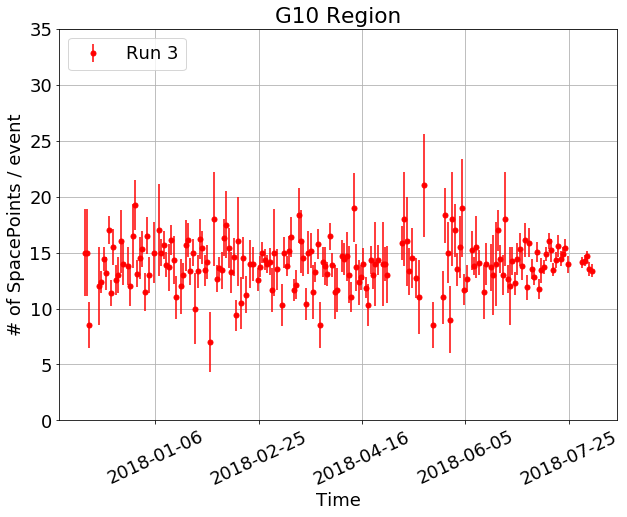

In [98]:
fig = plt.figure(figsize=(10,8))    
df_date_time_run3=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_run3=md.date2num(df_date_time_run3)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# 

print len(datenums_run3)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_run3,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='Run 3')

plt.xlabel('Time')
plt.ylabel('# of SpacePoints / event')
plt.title("G10 Region")
plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(0,35)
plt.grid()
plt.show()
fig.savefig('2018.png', dpi=400)

In [99]:
import datetime as dt
RUN_MIN = df_Event_beam_off_run1['evttime'].min()
RUN_MAX = df_Event_beam_off_run1['evttime'].max()
fig = plt.figure(figsize=(10,8))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/500000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_run1 = (df_Event_beam_off_run1.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_run1_shape= N_event_run1.shape[0]
    if (N_event_run1_shape == 0): continue
    N_G10_run1   = (df_Sps_beam_off_run1.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_run1 =N_G10_run1.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))')
    N_G10_run1_timestamp=N_G10_run1['evttime'].values
    N_G10_run1_shape = N_G10_run1.shape[0]
    Rate = N_G10_run1_shape / float(N_event_run1_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_run1_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_run1_shape)/N_event_run1_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    


<Figure size 720x576 with 0 Axes>

37
37


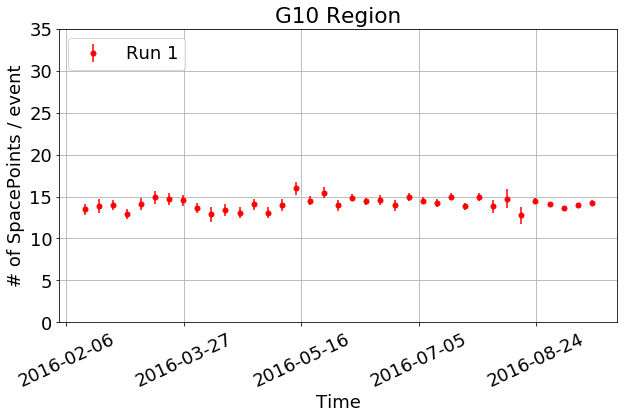

In [100]:
fig = plt.figure(figsize=(10,6))    
df_date_time_run1=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_run1=md.date2num(df_date_time_run1)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_run1)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_run1,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='Run 1')

plt.xlabel('Time')
plt.ylabel('# of SpacePoints / event')
plt.title("G10 Region")
plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(0,35)
plt.grid()
plt.show()
fig.savefig('2016.png', dpi=400)

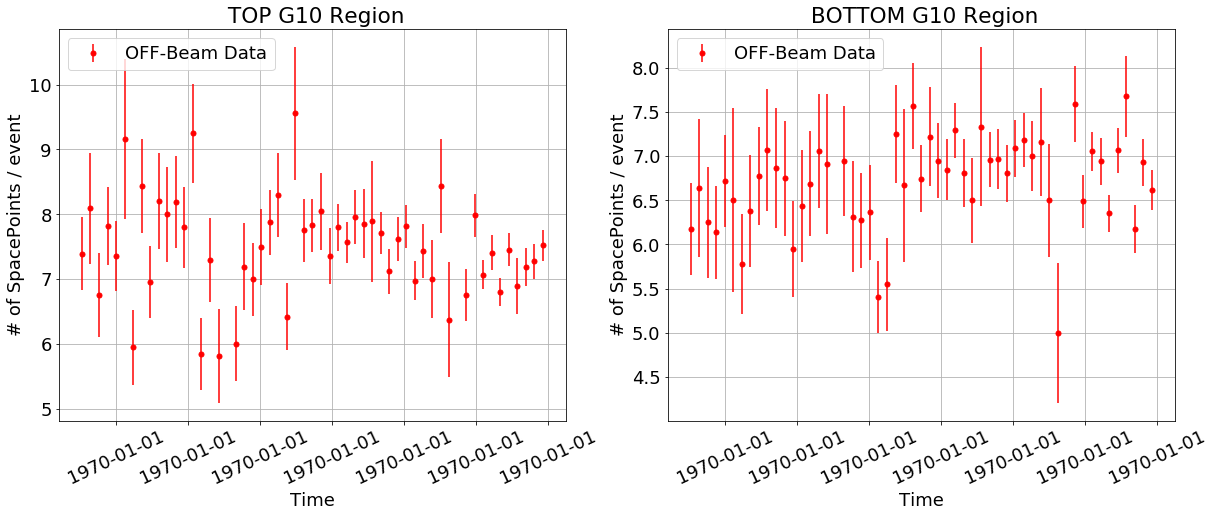

In [101]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
RUN_MIN_top = df_Event_beam_off_run1['N_Run'].min()
RUN_MAX_top = df_Event_beam_off_run1['N_Run'].max()

BINS_top=np.linspace(RUN_MIN_top,RUN_MAX_top,(RUN_MAX_top-RUN_MIN_top)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)
BIN_time_top=[]
BIN_CENTER_V_top = []
BIN_EFF_V_top = []
BIN_ERR_V_top=[]
for n in xrange(len(BINS_top)-1):
    BIN_MIN_top = BINS_top[n]
    BIN_MAX_top = BINS_top[n+1]
    # implement the code you had before to get EFFICIENCY
    N_event_top = (df_Event_beam_off_run1.query('N_Run > %i and N_Run < %i'%(BIN_MIN_top,BIN_MAX_top)))
    N_event_top_shape= N_event_top.shape[0]
    if (N_event_top_shape == 0): continue
    N_G10_top   = (df_Sps_beam_off_run1.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN_top,BIN_MAX_top)))
    N_G10_top =N_G10_top.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_top_timestamp=N_G10_top['evttime'].values
    N_G10_top_shape =N_G10_top.shape[0]
    Rate_top = N_G10_top_shape / float(N_event_top_shape)
    BIN_CENTER_V_top.append(0.5*(BIN_MIN_top+BIN_MAX_top))
    BIN_EFF_V_top.append(Rate_top)
    BIN_ERR_V_top.append(math.sqrt(N_G10_top_shape)/N_event_top_shape)
    BIN_time_top.append((N_G10_top_timestamp))


df_date_time_top=pd.to_datetime(BIN_CENTER_V_top,unit='s')
datenums_top=md.date2num(df_date_time_top)    
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)
#print datenums_top
xfmt_top = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt_top)


plt.errorbar(datenums_top,BIN_EFF_V_top,yerr=BIN_ERR_V_top,fmt='o',color='r',markersize=5,label='OFF-Beam Data')

plt.xlabel('Time')
plt.ylabel('# of SpacePoints / event')
plt.title(" TOP G10 Region")
plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
#plt.legend(loc=1)
#plt.ylim(2.5,7)
plt.grid()

plt.subplot(1, 2, 2)
RUN_MIN_bottom = df_Event_beam_off_run1['N_Run'].min()
RUN_MAX_bottom = df_Event_beam_off_run1['N_Run'].max()

BINS_bottom=np.linspace(RUN_MIN_bottom,RUN_MAX_bottom,(RUN_MAX_bottom-RUN_MIN_bottom)/50)#Bin width~10 
#vals,bine = np.histogram(N_event['N_Run'].values,bins=BINS)
#binc = 0.5*(bine[1:]+bine[:-1])
#vals = vals.astype(float)
BIN_time_bottom=[]
BIN_CENTER_V_bottom = []
BIN_EFF_V_bottom = []
BIN_ERR_V_bottom=[]
for m in xrange(len(BINS_bottom)-1):
    BIN_MIN_bottom = BINS_bottom[m]
    BIN_MAX_bottom = BINS_bottom[m+1]
    # implement the code you had before to get EFFICIENCY
    N_event_bottom = (df_Event_beam_off_run1.query('N_Run > %i and N_Run < %i'%(BIN_MIN_bottom,BIN_MAX_bottom)))
    N_event_bottom_shape= N_event_bottom.shape[0]
    if (N_event_bottom_shape == 0): continue
    N_G10_bottom   = (df_Sps_beam_off_run1.query('(N_Run > %i and N_Run < %i) '%(BIN_MIN_bottom,BIN_MAX_bottom)))
    N_G10_bottom =N_G10_bottom.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_bottom_timestamp=N_G10_bottom['evttime'].values
    N_G10_bottom_shape = N_G10_bottom.shape[0]
    Rate_bottom = N_G10_bottom_shape / float(N_event_bottom_shape)
    BIN_CENTER_V_bottom.append(0.5*(BIN_MIN_bottom+BIN_MAX_bottom))
    BIN_EFF_V_bottom.append(Rate_bottom)
    BIN_ERR_V_bottom.append(math.sqrt(N_G10_bottom_shape)/N_event_bottom_shape)
    BIN_time_bottom.append((N_G10_bottom_timestamp))
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)

#print BIN_time_bottom
df_date_time_bottom=pd.to_datetime(BIN_CENTER_V_bottom,unit='s')
datenums_bottom=md.date2num(df_date_time_bottom)    
#plt.scatter(BIN_CENTER_V,BIN_EFF_V)

xfmt_bottom = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt_bottom)


plt.errorbar(datenums_bottom,BIN_EFF_V_bottom,yerr=BIN_ERR_V_bottom,fmt='o',color='r',markersize=5,label='OFF-Beam Data')

plt.xlabel('Time')
plt.ylabel('# of SpacePoints / event')
plt.title(" BOTTOM G10 Region")
plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.grid()
#plt.ylim(2.5,7)
plt.show()

18
18


<Figure size 432x432 with 0 Axes>

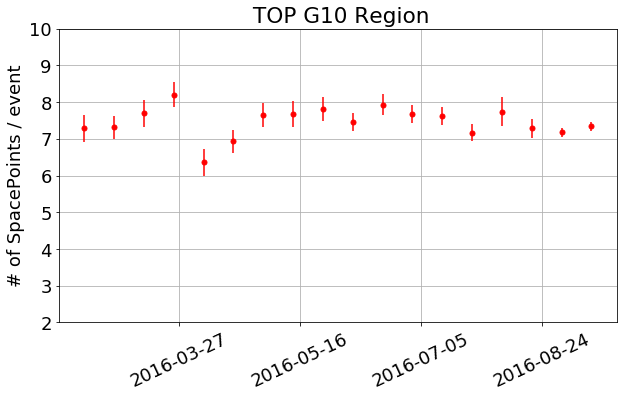

In [102]:
import datetime as dt
RUN_MIN = df_Event_beam_off_run1['evttime'].min()
RUN_MAX = df_Event_beam_off_run1['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/1000000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_run1 = (df_Event_beam_off_run1.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_run1_shape= N_event_run1.shape[0]
    if (N_event_run1_shape == 0): continue
    N_G10_run1   = (df_Sps_beam_off_run1.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_run1 =N_G10_run1.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_run1_timestamp=N_G10_run1['evttime'].values
    N_G10_run1_shape = N_G10_run1.shape[0]
    Rate = N_G10_run1_shape / float(N_event_run1_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_run1_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_run1_shape)/N_event_run1_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    
fig = plt.figure(figsize=(10,6))    
df_date_time_run1=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_run1=md.date2num(df_date_time_run1)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_run1)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_run1,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 1')

#plt.xlabel('UTC Time Stamp (s)')
plt.ylabel('# of SpacePoints / event')
plt.title(" TOP G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(2,10)
plt.grid()
plt.show()
fig.savefig('Top.png', dpi=400)

18
18


<Figure size 432x432 with 0 Axes>

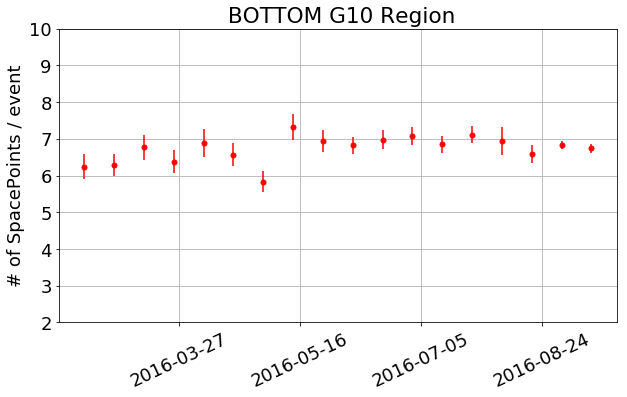

In [103]:
import datetime as dt
RUN_MIN = df_Event_beam_off_run1['evttime'].min()
RUN_MAX = df_Event_beam_off_run1['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/1000000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_run1 = (df_Event_beam_off_run1.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_run1_shape= N_event_run1.shape[0]
    if (N_event_run1_shape == 0): continue
    N_G10_run1   = (df_Sps_beam_off_run1.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_run1 =N_G10_run1.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_run1_timestamp=N_G10_run1['evttime'].values
    N_G10_run1_shape = N_G10_run1.shape[0]
    Rate = N_G10_run1_shape / float(N_event_run1_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_run1_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_run1_shape)/N_event_run1_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    
fig = plt.figure(figsize=(10,6))    
df_date_time_run1=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_run1=md.date2num(df_date_time_run1)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_run1)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_run1,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 1')

#plt.xlabel('UTC Time Stamp (s)')
plt.ylabel('# of SpacePoints / event')
plt.title(" BOTTOM G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(2,10)
plt.grid()
plt.show()
fig.savefig('Bottom.png', dpi=400)

In [104]:
df_G10_on_off_bottom=df_Sps_beam_on_off.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_G10_on_off_top=df_Sps_beam_on_off.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')


40
40


<Figure size 432x432 with 0 Axes>

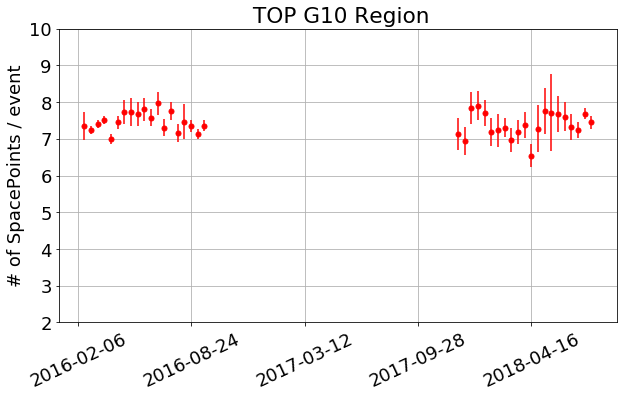

In [105]:
import datetime as dt
RUN_MIN = df_Event_beam_on_off['evttime'].min()
RUN_MAX = df_Event_beam_on_off['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/1000000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_on_off = (df_Event_beam_on_off.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_on_off_shape= N_event_on_off.shape[0]
    if (N_event_on_off_shape == 0): continue
    N_G10_on_off   = (df_Sps_beam_on_off.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_on_off =N_G10_on_off.query('((sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_on_off_timestamp=N_G10_on_off['evttime'].values
    N_G10_on_off_shape = N_G10_on_off.shape[0]
    Rate = N_G10_on_off_shape / float(N_event_on_off_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_on_off_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_on_off_shape)/N_event_on_off_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    
fig = plt.figure(figsize=(10,6))    
df_date_time_on_off=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_on_off=md.date2num(df_date_time_on_off)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_on_off)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_on_off,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 1')

#plt.xlabel('UTC Time Stamp (s)')
plt.ylabel('# of SpacePoints / event')
plt.title(" TOP G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(2,10)
plt.grid()
plt.show()
#fig.savefig('Top.png', dpi=400)

40
40


<Figure size 432x432 with 0 Axes>

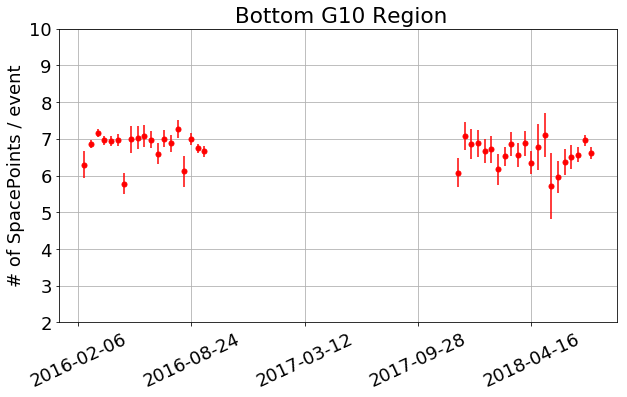

In [106]:
import datetime as dt
RUN_MIN = df_Event_beam_on_off['evttime'].min()
RUN_MAX = df_Event_beam_on_off['evttime'].max()
fig = plt.figure(figsize=(6,6))
BINS=np.linspace(RUN_MIN,RUN_MAX,(RUN_MAX-RUN_MIN)/1000000)

BIN_time=[]
BIN_CENTER_V = []
BIN_EFF_V = []
BIN_ERR_V=[]
for n in xrange(len(BINS)-1):
    BIN_MIN = BINS[n]
    BIN_MAX = BINS[n+1]
    N_event_on_off = (df_Event_beam_on_off.query('evttime > %i and evttime < %i'%(BIN_MIN,BIN_MAX)))
    N_event_on_off_shape= N_event_on_off.shape[0]
    if (N_event_on_off_shape == 0): continue
    N_G10_on_off   = (df_Sps_beam_on_off.query('(evttime > %i and evttime < %i) '%(BIN_MIN,BIN_MAX)))
    N_G10_on_off =N_G10_on_off.query('((sps_y < -90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>990 and sps_z<930) or (sps_z>1000 and sps_z<1200) )) or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
    N_G10_on_off_timestamp=N_G10_on_off['evttime'].values
    N_G10_on_off_shape = N_G10_on_off.shape[0]
    Rate = N_G10_on_off_shape / float(N_event_on_off_shape)    
    BIN_CENTER_V.append(0.5*(BIN_MIN+BIN_MAX))
    BIN_time.append((N_G10_on_off_timestamp))
    BIN_EFF_V.append(Rate)
    BIN_ERR_V.append(math.sqrt(N_G10_on_off_shape)/N_event_on_off_shape)
    #dates=[dt.datetime.fromtimestamp(N_G10_run3_timestamp)]
    
    
fig = plt.figure(figsize=(10,6))    
df_date_time_on_off=pd.to_datetime(BIN_CENTER_V,unit='s')
datenums_on_off=md.date2num(df_date_time_on_off)
#print df_date_time.shape[0]
#print BIN_EFF_V
#plt.errorbar(BIN_CENTER_V,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 3')
#plt.scatter(BIN_time.values,BIN_EFF_V.values)
# plt.ylim(6,12)

print len(datenums_on_off)
print len(BIN_EFF_V)

xfmt = md.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(xfmt)

plt.errorbar(datenums_on_off,BIN_EFF_V,yerr=BIN_ERR_V,fmt='o',color='r',markersize=5,label='OFF-Beam Data Run 1')

#plt.xlabel('UTC Time Stamp (s)')
plt.ylabel('# of SpacePoints / event')
plt.title(" Bottom G10 Region")
#plt.legend(loc=2)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.ylim(2,10)
plt.grid()
plt.show()
#fig.savefig('Bottom.png', dpi=400)